In [1]:
import sys
sys.path.append('../')

import src.dem as dem
import src.cell as cell
import src.controls as controls
import src.path as path
import src.flow as flow

## Load and plot DEM

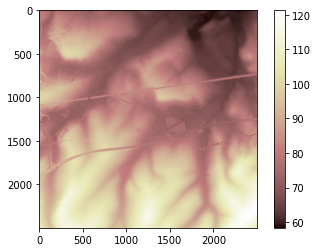

In [2]:
filename = r"C:\Users\pgred\Documents\Personal\Git\flow-path\data\in\20229620-DEFRA-Basingstoke_DTM_2m\SU65se_DTM_2m.tif"
test_dem = dem.DemTif(path=filename)
test_dem.plot()

## Setup model controls

In [3]:
test_controls = controls.Controls(
    dem = test_dem,
    slope_threshold = 45,
    divergent_flow = 2,
    persistence = 1,
    horizontal_flow = True,
    fahrboschung_angle = 2,
    max_n_steps = 1000,
    max_length = 2000,
    paths_per_flow=50
    )

## Initialise a single path
This can be done from array coordinates (row, column) in the *coords* variable of a *Cell* object or can be calculated from the map coordinates (x, y) using the *xy_coord_from_map_coords* method of a *Dem* object.

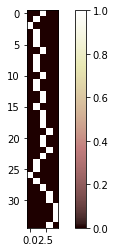

In [4]:
coords = test_dem.xy_coord_from_map_coords(map_coords=(465758.85, 153886.98))
test_cell = cell.Cell(controls=test_controls,coords=coords)
test_path = path.Path(controls=test_controls, start_cell=test_cell)
test_path.results.plot()

## Create a flow path
A flow path consists of numerous single paths, all initiated from the same start cell. The frequency each cell is visited is used to approximate the probability it will be affected by the flow path.

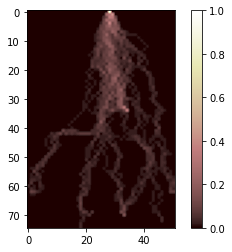

In [5]:
test_flow = flow.Flow(controls=test_controls, start_cell=test_cell)
test_flow.results.create_raster()
test_flow.results.plot()

## Create a map

In [6]:
# WIP
from src.map import Map
tl = test_dem.xy_coord_from_map_coords(map_coords=(465727.1, 153906.2))
br = test_dem.xy_coord_from_map_coords(map_coords=(465744.9, 153895.1))
test_map = Map(controls=test_controls)
test_map.from_box(top_left_coords=(tl), bottom_right_coords=(br))

In [8]:
# wip how quick does it run?
# n = 16
# start_coords = (465762.69, 153922.9)

# n_runs = int(n **0.5)
# for i in range(n_runs):
#     for j in range(n_runs):
#         xy_coords = (start_coords[0] + i, start_coords[1] + j)
#         coords = test_dem.xy_coord_from_map_coords(map_coords=xy_coords)
#         test_cell = cell.Cell(controls=test_controls, coords=coords)
#         test_flow = flow.Flow(controls=test_controls, start_cell=test_cell)
#         test_flow.results.create_raster(filename=str(i) + '_' + str(j) + ".tif")